# Spam Filter Project


### Dataset 
URL: https://archive.ics.uci.edu/ml/datasets/sms+spam+collectionDataset

In [32]:
# Basic libraries for data preprocessing and EDA

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [59]:
from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

# Scikit Learn libraries for ML models

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [34]:
# Wordnet libraries for feature extraction and word display

import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to /Users/hok/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading Data

In [35]:
data = pd.read_csv('./Data/SMSSpamCollection.csv')

In [36]:
data.head()

,Spam,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
data['label'] = data['Spam'].map({'spam':1, 'ham':0})

#  <span style='color:Blue'> 1. EDA  </span>

***

In [38]:
data.head()

,Spam,Text,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [39]:
data.shape

(5574, 3)

In [40]:
ROWS = data.shape[0]
COLS = data.shape[1]

print(f'Rows: {ROWS}, Columns: {COLS}')

Rows: 5574, Columns: 3


In [41]:
data.columns

Index(['Spam', 'Text', 'label'], dtype='object')

In [42]:
# Check the total number for each category of the label
data.groupby('label').count()

,Spam,Text
label,,
0,4827,4827
1,747,747


In [43]:
data['length'] = data['Text'].map(lambda text: len(text))



In [44]:
data.head()

,Spam,Text,label,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [45]:
data.groupby('label').length.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,4827.0,71.527035,58.330761,2.0,33.0,52.0,93.0,910.0
1,747.0,139.119143,28.998900,13.0,133.0,149.0,158.0,224.0


### Visualize Length Distribution 

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

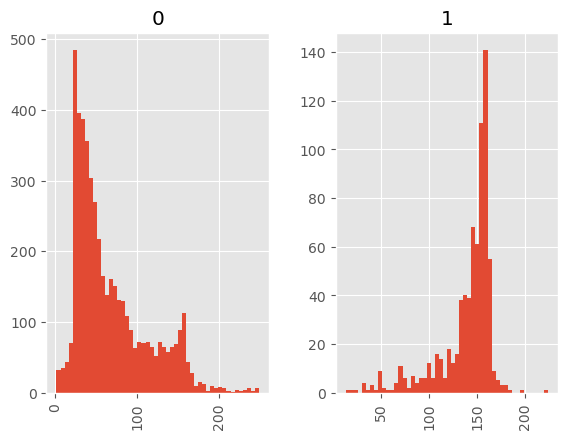

In [46]:
emails_subset = data[data.length < 250]
emails_subset.hist(column='length', by='label', bins=50)

#  <span style='color:Blue'> 2. Extracting Features  </span>

In [48]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /Users/hok/nltk_data...
UsageError: Line magic function `%%time` not found.


In [49]:
%%time
lemmatizer = WordNetLemmatizer()
data['text_lemmatized'] = data['Text'].map(lambda text: (' '.join(lemmatizer.lemmatize(w.lower()) for w in nltk.word_tokenize(text.lower()))))

CPU times: user 2.48 s, sys: 180 ms, total: 2.66 s
Wall time: 2.93 s


In [50]:
data.head()

,Spam,Text,label,length,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,"go until jurong point , crazy .. available onl..."
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar ... joking wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say so early hor ... u c already then sa...
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,"nah i do n't think he go to usf , he life arou..."


In [52]:
# Compare a sample Text and the corresponding Lemmatized Text
print(data['Text'][2])
print("\nLemmatized Email:\n")
print(data['text_lemmatized'][2])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

Lemmatized Email:

free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question ( std txt rate ) t & c 's apply 08452810075over18 's


## Generate Wordcloud of Spam SMS

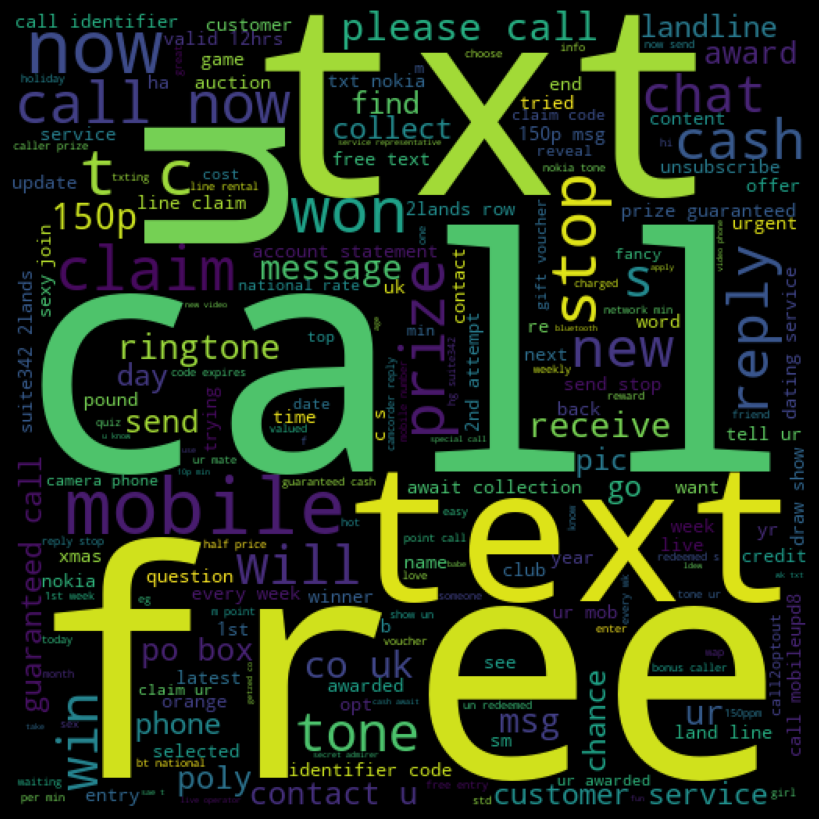

In [53]:
# The word cloud helps easily identify the most frequent words in spams
spam_words = ''.join(list(data[data['label']==1]['text_lemmatized']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## Generate Wordcloud of Ham SMS

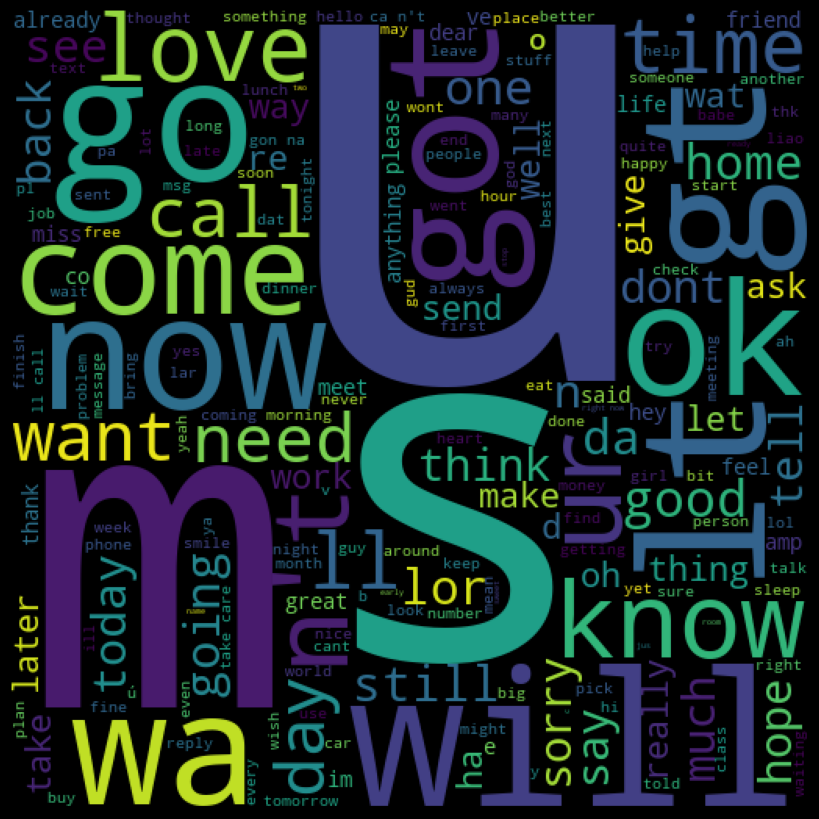

In [55]:
# The word cloud helps easily identify the most frequent words in hams
spam_words = ''.join(list(data[data['label']==0]['text_lemmatized']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [56]:
X = data["text_lemmatized"]

y = data['label'] # 1D targer vector

print(X.shape)
print(y.shape)

(5574,)
(5574,)


## Create Train and Test Dataset

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Experiment 1: Support Vector Machine (LinearSVC)

In [60]:
svm_linearsvc = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', LinearSVC(loss='hinge', random_state=42)),
    ])

## Hyperparameter Tuning for LinearSVC Model

In [61]:
%%time
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__stop_words': ['english', None],
    'clf__C': [0.1, 1, 5, 10],
}

svm_linearsvc_cv = GridSearchCV(svm_linearsvc, param_grid, scoring='accuracy', cv=5)

svm_linearsvc_cv = svm_linearsvc_cv.fit(X_train, y_train)


print("\nBest Score: %f" % svm_linearsvc_cv.best_score_)

print("\nOptimal Hyperparameter Values: ")

for param_name in sorted(param_grid.keys()):
    print("%s: %r" % (param_name, svm_linearsvc_cv.best_params_[param_name]))

/Users/hok/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hok/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Best Score: 0.987665

Optimal Hyperparameter Values: 
clf__C: 1
vect__ngram_range: (1, 2)
vect__stop_words: None
CPU times: user 9.82 s, sys: 47.1 ms, total: 9.87 s
Wall time: 9.99 s


## Train the  LinearSVC Model with Optimal Config

In [62]:
%%time
svm_linearsvc = Pipeline([
        ('vect', CountVectorizer(stop_words=None, ngram_range=(1, 2), binary=False)),
        ('tfidf', TfidfTransformer()),
        ('clf', LinearSVC(loss='hinge', C=1, random_state=42)),
    ])

svm_linearsvc.fit(X_train, y_train)  

CPU times: user 202 ms, sys: 16.8 ms, total: 219 ms
Wall time: 223 ms


Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(C=1, loss='hinge', random_state=42))])

## Evaluate LinearSVC Model on Test Data 

In [63]:
%%time

y_test_predicted = svm_linearsvc.predict(X_test)

print("\nAccuracy: ", np.mean(y_test_predicted == y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted, average='micro') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted, average='micro')
print("\nTest Recall = %f" % recall_test)

f1_test = f1_score(y_test, y_test_predicted, average='micro')
print("\nTest F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted, target_names = ["Not Spam", "Spam"]))


Accuracy:  0.9874439461883409

Test Confusion Matrix:
[[951   3]
 [ 11 150]]

Test Precision = 0.987444

Test Recall = 0.987444

Test F1 Score = 0.987444

Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.99      1.00      0.99       954
        Spam       0.98      0.93      0.96       161

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

CPU times: user 37.6 ms, sys: 7.17 ms, total: 44.8 ms
Wall time: 48.3 ms


In [86]:
svm_svc_linear = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(kernel='linear')),
    ])

In [87]:
%%time
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__stop_words': ['english', None],
    'clf__C': [0.1, 1, 5, 10],
}

svm_svc_linear_cv = GridSearchCV(svm_svc_linear, param_grid, scoring='accuracy', cv=5)

svm_svc_linear_cv = svm_svc_linear_cv.fit(X_train, y_train)


print(f"\nBest Score: {svm_svc_linear_cv.best_score_}" )

print("\nOptimal Hyperparameter Values: ")

for param_name in sorted(param_grid.keys()):
    print(f"{param_name}: {svm_svc_linear_cv.best_params_[param_name]}")


Best Score: 0.987665141701016

Optimal Hyperparameter Values: 
clf__C: 1
vect__ngram_range: (1, 2)
vect__stop_words: None
CPU times: user 55.2 s, sys: 494 ms, total: 55.7 s
Wall time: 59.8 s


In [88]:
%%time
svm_svc_linear = Pipeline([
        ('vect', CountVectorizer(stop_words=None, ngram_range=(1, 2), binary=False)),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(kernel='linear', C=1, random_state=42)),
    ])

svm_svc_linear.fit(X_train, y_train)  

CPU times: user 1.23 s, sys: 7.22 ms, total: 1.24 s
Wall time: 1.25 s


Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', SVC(C=1, kernel='linear', random_state=42))])

In [89]:
%%time

y_test_predicted = svm_svc_linear.predict(X_test)



CPU times: user 279 ms, sys: 2.8 ms, total: 282 ms
Wall time: 291 ms


In [90]:
print("\nAccuracy: ", np.mean(y_test_predicted == y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted, average='micro') 
print(f"\nTest Precision = {precision_test}" )

recall_test = recall_score(y_test, y_test_predicted, average='micro')
print(f"\nTest Recall = {recall_test}" )

f1_test = f1_score(y_test, y_test_predicted, average='micro')
print(f"\nTest F1 Score = {f1_test}" )

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted, target_names = ["Not Spam", "Spam"]))


Accuracy:  0.9874439461883409

Test Confusion Matrix:
[[951   3]
 [ 11 150]]

Test Precision = 0.9874439461883409

Test Recall = 0.9874439461883409

Test F1 Score = 0.9874439461883409

Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.99      1.00      0.99       954
        Spam       0.98      0.93      0.96       161

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



## Experiment 2: Support Vector Machine (Support Vector Machine (Stochastic Gradient Descent using the SGDClassifier))

In [64]:
%%time

svm_sgd = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SGDClassifier(loss='hinge')),
    ])

CPU times: user 227 µs, sys: 890 µs, total: 1.12 ms
Wall time: 3.45 ms


## Hyperparameter Tuning for SGDClassifier Model

In [71]:
%%time
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__stop_words': ['english', None],
    'clf__alpha': [ 1e-4, 1e-5],
    'clf__penalty': ['l2', 'l1'],
}

svm_sgd_cv = GridSearchCV(svm_sgd, param_grid, scoring='accuracy', cv=5)

svm_sgd_cv = svm_sgd_cv.fit(X_train, y_train)

print(f"\nBest Score: svm_sgd_cv.best_score_" )

print("\nOptimal Hyperparameter Values: ")

for param_name in sorted(param_grid.keys()):
    print("%s: %r" % (param_name, svm_sgd_cv.best_params_[param_name]))


Best Score: svm_sgd_cv.best_score_

Optimal Hyperparameter Values: 
clf__alpha: 0.0001
clf__penalty: 'l2'
vect__ngram_range: (1, 2)
vect__stop_words: None
CPU times: user 52.2 s, sys: 11 s, total: 1min 3s
Wall time: 8.05 s


## Train the SGDClassifier Model with optimal config

In [76]:
%%time

svm_sgd = Pipeline([
        ('vect', CountVectorizer(stop_words=None, ngram_range=(1, 2), binary=False)),
        ('tfidf', TfidfTransformer()),
        ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, random_state=42, max_iter=150, tol=1e-1)),
    ])

svm_sgd.fit(X_train, y_train) 

CPU times: user 190 ms, sys: 8.95 ms, total: 199 ms
Wall time: 172 ms


Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(max_iter=150, random_state=42, tol=0.1))])

## Evaluate SGDClassifier Model on Test Data

In [77]:
%%time

y_test_predicted = svm_sgd.predict(X_test)

print("\nAccuracy: ", np.mean(y_test_predicted == y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted, average='micro') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted, average='micro')
print("\nTest Recall = %f" % recall_test)

f1_test = f1_score(y_test, y_test_predicted, average='micro')
print("\nTest F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted, target_names = ["Not Spam", "Spam"]))


Accuracy:  0.9883408071748879

Test Confusion Matrix:
[[951   3]
 [ 10 151]]

Test Precision = 0.988341

Test Recall = 0.988341

Test F1 Score = 0.988341

Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.99      1.00      0.99       954
        Spam       0.98      0.94      0.96       161

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

CPU times: user 43.4 ms, sys: 1.89 ms, total: 45.3 ms
Wall time: 44.2 ms


,Classifier,Accuracy,Tuning-Time
0,LinearSVC,0.98744,223 ms
1,SGD SVM,0.98834,194 ms


In [80]:
clf_multinomialNB = Pipeline([
        ('vect', CountVectorizer()),
        ('clf', MultinomialNB()),
    ])

In [81]:
%%time
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__stop_words': ['english', None],
    'clf__alpha': [1e-1, 1.0, 1.5, 1.8],
}

clf_multinomialNB_cv = GridSearchCV(clf_multinomialNB, param_grid, scoring='f1', cv=5)

clf_multinomialNB_cv = clf_multinomialNB_cv.fit(X_train, y_train)


print("\nBest Score: %f" % clf_multinomialNB_cv.best_score_)

print("\nOptimal Hyperparameter Values: ")

for param_name in sorted(param_grid.keys()):
    print(f"{param_name}: {clf_multinomialNB_cv.best_params_[param_name]}")


Best Score: 0.944990

Optimal Hyperparameter Values: 
clf__alpha: 0.1
vect__ngram_range: (1, 1)
vect__stop_words: None
CPU times: user 7.33 s, sys: 34.1 ms, total: 7.37 s
Wall time: 7.52 s


In [82]:
%%time
clf_multinomialNB = Pipeline([
        ('vect', CountVectorizer(stop_words='english', ngram_range=(1, 2), binary=False)),
        #('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB(alpha=0.1)),
    ])

clf_multinomialNB.fit(X_train, y_train)  

CPU times: user 136 ms, sys: 4.48 ms, total: 141 ms
Wall time: 143 ms


Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('clf', MultinomialNB(alpha=0.1))])

In [83]:
y_test_predicted = clf_multinomialNB.predict(X_test)


In [84]:

print("\nAccuracy: ", np.mean(y_test_predicted == y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted) 
print(f"\nTest Precision = {precision_test}" )

recall_test = recall_score(y_test, y_test_predicted)
print(f"Test Recall = {recall_test}" )

f1_test = f1_score(y_test, y_test_predicted)
print(f"Test F1 Score = {f1_test}"  )

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted, target_names = ["Not Spam", "Spam"]))


Accuracy:  0.9865470852017937

Test Confusion Matrix:
[[948   6]
 [  9 152]]

Test Precision = 0.9620253164556962
Test Recall = 0.9440993788819876
Test F1 Score = 0.9529780564263323

Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.99      0.99      0.99       954
        Spam       0.96      0.94      0.95       161

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [91]:
data = [["LinearSVC", 0.98744, "223 ms"], 
        ["SVC (Linear Kernel)", 0.98744, "1.25 s"],
        ["SGD SVM", 0.98834, "194 ms"],
       ["Multinomial NB", 0.98654, "143 ms"]]

pd.DataFrame(data, columns=["Classifier", "Accuracy", "Tuning-Time"])

,Classifier,Accuracy,Tuning-Time
0,LinearSVC,0.98744,223 ms
1,SVC (Linear Kernel),0.98744,1.25 s
2,SGD SVM,0.98834,194 ms
3,Multinomial NB,0.98654,143 ms
